<a href="https://colab.research.google.com/github/para63492/deep-learning-from-scratch/blob/master/Kaira10%E7%AB%A0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#ユークリッド距離
import numpy as np
x=np.array([1,1])
y=np.array([2,2])

np.linalg.norm(x-y)

1.4142135623730951

In [ ]:
#マンハッタン距離
import numpy as np
a=np.array([1,1])
b=np.array([2,2])

np.linalg.norm(a-b,ord=1)

2.0

In [ ]:
#チェビシェフ距離
from scipy.spatial.distance import chebyshev
a = np.array([1,1,1])
b = np.array([1,2,4])
 
chebyshev(a, b)

3

In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()

In [ ]:
#ライブラリーのインポート
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
%matplotlib inline
sns.set_style('whitegrid')
from scipy.cluster import hierarchy

In [ ]:
df = pd.DataFrame(iris.data,columns=iris.feature_names)

In [ ]:
iris_arr = np.array([df["sepal length (cm)"].tolist(),
                    df['sepal width (cm)'].tolist(),
                    df['petal length (cm)'].tolist(),
                    df['petal width (cm)'].tolist()])

In [ ]:
clusters=3

pred = KMeans(n_clusters=clusters).fit_predict(iris_arr)
pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [ ]:
df['cluster_id']=pred
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),cluster_id
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,0
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [ ]:
df['cluster_id'].value_counts()

0    62
1    50
2    38
Name: cluster_id, dtype: int64

In [ ]:
clusterinfo = pd.DataFrame()
for i in range(clusters):
    clusterinfo['cluster' + str(i)] = df[df['cluster_id'] == i].mean()
clusterinfo = clusterinfo.drop('cluster_id')

clusterinfo

,cluster0,cluster1,cluster2
sepal length (cm),5.901613,5.006,6.850000
sepal width (cm),2.748387,3.428,3.073684
petal length (cm),4.393548,1.462,5.742105
petal width (cm),1.433871,0.246,2.071053


[Text(0, 0, 'cluster0'), Text(0, 0, 'cluster1'), Text(0, 0, 'cluster2')]

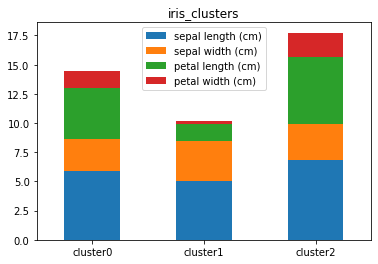

In [ ]:
my_plot = clusterinfo.T.plot(kind='bar', stacked=True, title="iris_clusters")
my_plot.set_xticklabels(my_plot.xaxis.get_majorticklabels(), rotation=0)

In [ ]:
# データ読み込み
iris = load_iris()
iris.keys()

df_iris = iris.data
df_target = iris.target
target_names = iris.target_names
df_labels = target_names[df_target]

# データの正規化（平均0, 標準偏差1）
scaler = StandardScaler()
df_iris_std = scaler.fit_transform(df_iris)

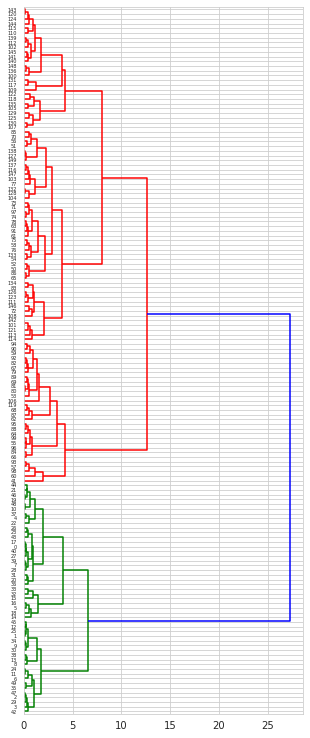

In [ ]:
# 距離計算
dist = hierarchy.distance.pdist(df_iris_std, metric='euclidean')

# クラスタリング
linkage = hierarchy.linkage(dist, method='ward')

# デンドログラム
fig, ax = plt.subplots(figsize=(5,13))
ax = hierarchy.dendrogram(Z=linkage,
                orientation='right',
                )
fig.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Gaussian Mixture Model')

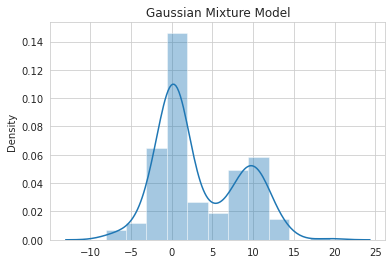

In [ ]:
x1 = np.random.normal(loc=0.5, scale=1 , size =100).reshape(-1,1)
x2 = np.random.normal(loc=10, scale=2 , size =100).reshape(-1,1)
x3 = np.random.normal(loc=0, scale=3 , size =100).reshape(-1,1)
x = np.concatenate([x1 , x2 , x3])
sns.distplot( x )
plt.title("Gaussian Mixture Model")

In [ ]:
def Gaus(x,m, s): #正規分布の値を取得
    g = np.exp( - pow((x-m), 2) /(2*s) )/np.sqrt(2*np.pi * s )
    return g

def calc_gamma(x, pi, mu, sig):#事後分布の計算
    gam = pi*Gaus(x,mu,sig)
    gam/= np.sum(gam, axis=1).reshape(len(x),1)
    return gam

def update_parmas(gamma, x, pi, mu, sig):#パラメーターの更新式
    N_k = np.sum(gamma, axis=0)
    N = np.sum(N_k)
    mu_k = np.sum(x*gamma, axis=0 ) /N_k
    sig_k = np.sum(gamma* pow(x-mu, 2), axis=0) /N_k
    pi_k = N_k/N
    return pi_k , mu_k, sig_k 

def iteration(x,mu,sig,pi, I=100, e=0.01):#ε以下になるか、100回計算するまで尤度を更新する関数
    LF=0   
    for i in range(I):
        gamma = calc_gamma(x, pi, mu, sig)
        LF_new =np.sum(np.log(np.sum(pi*Gaus(x,mu,sig),axis=1 )) )
        ch = LF_new - LF
        print("LF ={} . change = {}".format(LF_new, ch))
        if np.abs(ch) < e:
            print("Iteration is finished {} iter. ".format(i+1))
            break
        LF=LF_new
        pi, mu, sig = update_parmas(gamma, x, pi, mu, sig)

    return pi, mu, sig   

In [ ]:
mu =np.array([0,10,3])
sig=np.array([1, 5, 10])
pi=np.array([0.1,0.4, 0.5])
pi, mu, sig = iteration(x,mu,sig, pi, I=100)

LF =-894.5099737779672 . change = -894.5099737779672
LF =-840.2810150044231 . change = 54.228958773544036
LF =-833.1289942637972 . change = 7.1520207406259715
LF =-830.2395743255455 . change = 2.889419938251649
LF =-828.66105047735 . change = 1.5785238481954593
LF =-827.7484215210957 . change = 0.9126289562543661
LF =-827.1974833523338 . change = 0.5509381687618315
LF =-826.8523268742933 . change = 0.34515647804050786
LF =-826.6290531728623 . change = 0.22327370143102598
LF =-826.4805107115351 . change = 0.14854246132722437
LF =-826.3791662127587 . change = 0.10134449877637053
LF =-826.3084167051688 . change = 0.07074950758988052
LF =-826.2579748337018 . change = 0.050441871467000965
LF =-826.2213118938265 . change = 0.03666293987532754
LF =-826.1941923709926 . change = 0.027119522833913834
LF =-826.1738111517558 . change = 0.020381219236810466
LF =-826.1582738360723 . change = 0.01553731568344574
LF =-826.1462771929016 . change = 0.011996643170732568
LF =-826.1369088513457 . change = 

In [ ]:
print(pi, mu, np.sqrt(sig) )

[0.37372422 0.33397642 0.29229937] [2.14562714e-01 9.77804691e+00 3.67765161e-03] [1.01009586 2.26097792 3.26853728]


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Predicted GMM')

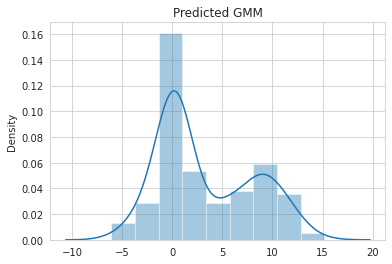

In [ ]:
y0 = np.random.normal(loc=mu[0], scale=np.sqrt(sig)[0] , size =int(300*pi[0]) ).reshape(-1,1)
y1 = np.random.normal(loc=mu[1], scale=np.sqrt(sig)[1] , size =int(300*pi[1]) ).reshape(-1,1)
y2 = np.random.normal(loc=mu[2], scale=np.sqrt(sig)[2] , size =int(300*pi[2]) ).reshape(-1,1)
y=np.concatenate([y0, y1, y2])
sns.distplot(y)
plt.title("Predicted GMM")

EMアルゴリズムのpythonによる実装と一般化
https://masamunetogetoge.com/em-algorithm-python
